In [1]:
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import zscore

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
database_path = "/content/drive/My Drive/DBs/K-Means/"

In [3]:
missing_values = ['?', 'Missing', 'missing']
database = pd.read_csv(database_path + "Mall_Customers.csv", na_values=missing_values)

In [4]:
database.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
database.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [6]:
database.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
dummy_db = pd.get_dummies(database["Genre"])

In [8]:
database = pd.concat([database, dummy_db], axis =1)

In [9]:
database = database.drop(["Genre", "CustomerID","Male"], axis = 1)
database.head(4)

,Age,Annual Income (k$),Spending Score (1-100),Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1


In [10]:
database = database.apply(zscore)

In [11]:
database.head(4)

,Age,Annual Income (k$),Spending Score (1-100),Female
0,-1.424569,-1.738999,-0.434801,-1.128152
1,-1.281035,-1.738999,1.195704,-1.128152
2,-1.352802,-1.700830,-1.715913,0.886405
3,-1.137502,-1.700830,1.040418,0.886405


In [12]:
clustor_range = range(2,8)
clustor_error = []
clustor_sil_score = []

In [13]:
for k in clustor_range:
    model = KMeans(n_clusters=k, init="k-means++", random_state=2)
    model.fit(database)
    clustor_error.append(model.inertia_)
    labels = model.labels_
    clustor_sil_score.append(metrics.silhouette_score(database, labels, metric='euclidean'))

In [14]:
model_df = pd.DataFrame({'Number_of_Cluster':clustor_range, 'Error': clustor_error})

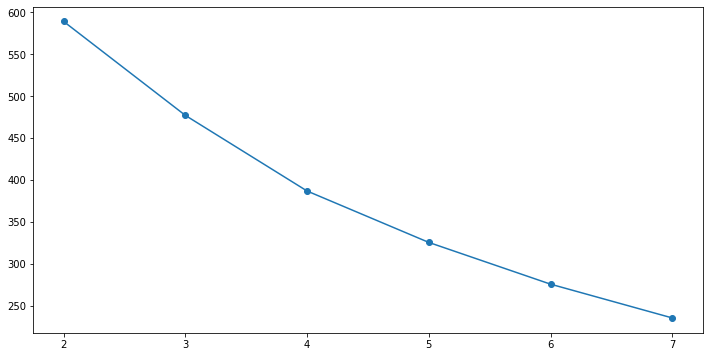

In [15]:
plt.figure(figsize=(12,6))
plt.plot(  model_df.Number_of_Cluster ,  model_df.Error, marker = 'o' )

In [16]:
clustor_error

[588.8026767824936,
 476.86006878694354,
 386.7147857740687,
 325.4485704854348,
 275.7007524062212,
 235.4309961723149]

By Looking at the graph we can choose either n_cluster to be 2 or 3.

In [17]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 2)
model.fit(database)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [18]:
labels = pd.DataFrame(model.labels_)

In [19]:
database = database.join(labels)
database.head(20)

,Age,Annual Income (k$),Spending Score (1-100),Female,0
0,-1.424569,-1.738999,-0.434801,-1.128152,0
1,-1.281035,-1.738999,1.195704,-1.128152,0
2,-1.352802,-1.700830,-1.715913,0.886405,1
3,-1.137502,-1.700830,1.040418,0.886405,0
4,-0.563369,-1.662660,-0.395980,0.886405,1
5,-1.209269,-1.662660,1.001596,0.886405,0
6,-0.276302,-1.624491,-1.715913,0.886405,1
7,-1.137502,-1.624491,1.700384,0.886405,0
8,1.804932,-1.586321,-1.832378,-1.128152,2
9,-0.635135,-1.586321,0.846310,0.886405,0
